<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/Boston_Hidden_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

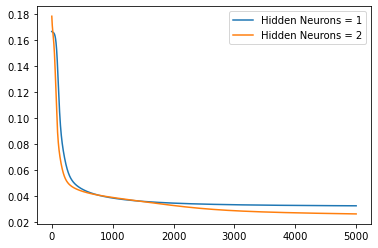

In [1]:
# Boston Housing with a Hidden Layer
# Imports
import numpy as np
import matplotlib.pyplot as plt
# Import keras so that we can access the Boston housing data
from tensorflow import keras

## Parameters
num_epochs = 5000
max_num_hidden = 2
# base eta value
eta = 0.05

## Functions
def uniform_random_matrix (rows, cols):
    res = [[np.random.uniform () for c in range (cols)] for r in range (rows)]
    return np.matrix (res)

## Load the data
dataset = keras.datasets.boston_housing
(train_X, train_y), (_,_) = dataset.load_data (test_split = 0)
train_X = np.matrix (train_X)
train_y = np.matrix (train_y)
(num_samples, num_inputs) = train_X.shape
# Add bias
bias = np.ones (num_samples)
bias = np.matrix (bias).transpose ()
train_X = np.append (train_X, bias, axis=1)

## Normalize data
for i in range (num_inputs):
    col = train_X[:,i]
    train_X[:,i] = (col - col.mean()) / col.std()
miny = train_y.min ()
maxy = train_y.max ()
mean = (maxy + miny)/2
std  = (maxy - miny)/2
train_y = (train_y - mean)/std
# Adjust for bias column
num_inputs += 1
# Adjust for sample size
eta /= num_samples

## Test various hidden node counts
for num_hidden in range (1, max_num_hidden + 1):

    ## Initialise weights
    np.random.seed (123456)
    w_hidden = 0.1*uniform_random_matrix (num_inputs, num_hidden)
    w_output = 0.1*uniform_random_matrix (num_hidden+1, 1)

    ## Iterate
    mse = []
    for _ in range (num_epochs):
        # Outputs
        phi = np.append (bias, np.tanh (train_X*w_hidden), axis=1)
        y = phi * w_output
        err = y - train_y.transpose ()
        # Gradients
        g_output = phi.transpose() * err
        phi_range = np.array (phi [:, range (1, num_hidden+1)])
        w_output_range = w_output [range (1, num_hidden+1), 0].transpose()
        err_term = np.array (err*w_output_range)
        g_hidden = train_X.transpose() * np.matrix((1 - phi_range**2)*err_term)
        # Update weights
        w_output -= eta * g_output
        w_hidden -= eta * g_hidden
        mse.append (err.var ())

    ## Plot
    plt.plot (range (num_epochs), mse, label="Hidden Neurons = {0}".format (num_hidden))

plt.legend ()
plt.show ()